# Modeling and Prediction of Bacterial Growth Using Polynomial and Exponential Regression

### Maykoll Jair Gil Martinez
#### mjgilm@libertadores.edu.co
##### Asignature Data Science

* This notebook aims to model and predict bacterial growth using Polynomial Regression (degree 3) and Exponential Regression.

+ The study analyzes growth trends and evaluates model accuracy to aid in microbiology and biotechnological applications.


## Methodology  
### Importing Libraries  
To perform the analysis, we first import the necessary libraries:  
- **NumPy**: Used for numerical operations and handling arrays.  
- **Pandas**: Used for data manipulation and analysis.  


In [1]:
# Import  libraries that are the most important for the analytics
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation


### Loading the Dataset  
The dataset containing bacterial growth curves is stored in an Excel file.  
We will load it using the `pandas` library and inspect its first rows to understand its structure.


In [2]:
# Load the Excel file
file_path = "KHKgrowthcurves_LB.xlsx"  # Ensure the filename is correct
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


,time (h),No 1-1,No 1-2,No 1-3,No 1-4,No 1-5,No 1-6,No 1-7,No 1-8,No 1-9,No 1-10,No 1-11,No 1-12
0,0.5,0.001,0.000,0.000,0.004,0.001,0.001,-0.001,0.0,-0.001,-0.001,0.0,0.000
1,1.0,0.001,0.000,0.001,0.004,0.001,0.001,-0.001,0.0,-0.001,-0.001,0.0,0.000
2,1.5,0.002,0.001,0.002,0.004,0.002,0.002,-0.001,0.0,-0.001,-0.001,0.0,0.000
3,2.0,0.005,0.003,0.004,0.007,0.004,0.005,0.000,0.0,-0.001,-0.001,0.0,0.000
4,2.5,0.010,0.008,0.010,0.012,0.009,0.010,0.000,0.0,0.000,0.000,0.0,0.001


### Dataset Overview  
To understand the structure of the dataset, we will check its dimensions (number of rows and columns) and inspect its data types.


In [3]:
df.shape

(46, 13)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time (h)  46 non-null     float64
 1   No 1-1    46 non-null     float64
 2   No 1-2    46 non-null     float64
 3   No 1-3    46 non-null     float64
 4   No 1-4    46 non-null     float64
 5   No 1-5    46 non-null     float64
 6   No 1-6    46 non-null     float64
 7   No 1-7    46 non-null     float64
 8   No 1-8    46 non-null     float64
 9   No 1-9    46 non-null     float64
 10  No 1-10   46 non-null     float64
 11  No 1-11   46 non-null     float64
 12  No 1-12   46 non-null     float64
dtypes: float64(13)
memory usage: 4.8 KB


### Statistical Summary of the Dataset  
We will generate a statistical summary of the dataset, including measures such as mean, standard deviation, minimum, and maximum values for each numerical column.


In [5]:
df.describe()


,time (h),No 1-1,No 1-2,No 1-3,No 1-4,No 1-5,No 1-6,No 1-7,No 1-8,No 1-9,No 1-10,No 1-11,No 1-12
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,11.750000,0.720848,0.739957,0.719696,0.742826,0.722891,0.741891,0.741978,0.766239,0.740391,0.768739,0.743913,0.771000
std,6.711309,0.352494,0.364303,0.354577,0.364699,0.357240,0.364902,0.450986,0.456356,0.452345,0.459919,0.451567,0.460821
min,0.500000,0.001000,0.000000,0.000000,0.004000,0.001000,0.001000,-0.001000,0.000000,-0.001000,-0.001000,0.000000,0.000000
25%,6.125000,0.651250,0.671500,0.633750,0.663500,0.634750,0.665000,0.321750,0.363500,0.314000,0.352750,0.325500,0.354750
50%,11.750000,0.926000,0.952000,0.928500,0.959500,0.935000,0.945000,0.929000,0.972500,0.915500,0.974000,0.922000,0.975000
75%,17.375000,0.932750,0.956750,0.939750,0.963000,0.946500,0.966000,1.112250,1.130000,1.119500,1.142500,1.114750,1.145000
max,23.000000,0.951000,0.974000,0.954000,0.978000,0.960000,0.983000,1.184000,1.175000,1.187000,1.190000,1.190000,1.194000


### Checking for Missing Values  
We will analyze the dataset to identify any missing values in each column. Handling missing data is crucial to ensure the accuracy of our model.


In [6]:
df.isnull().sum()


time (h)    0
No 1-1      0
No 1-2      0
No 1-3      0
No 1-4      0
No 1-5      0
No 1-6      0
No 1-7      0
No 1-8      0
No 1-9      0
No 1-10     0
No 1-11     0
No 1-12     0
dtype: int64

### Detecting and Visualizing Outliers  
Outliers can significantly affect model accuracy. We use the **Interquartile Range (IQR) method** to identify extreme values in the dataset. Additionally, we visualize bacterial growth curves over time.


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers using the IQR method
def detectar_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function and count outliers per column
outliers = detectar_outliers(df.iloc[:, 1:])  # Exclude 'time (h)' column
outliers.sum()



No 1-1     8
No 1-2     9
No 1-3     8
No 1-4     8
No 1-5     8
No 1-6     8
No 1-7     0
No 1-8     0
No 1-9     0
No 1-10    0
No 1-11    0
No 1-12    0
dtype: int64

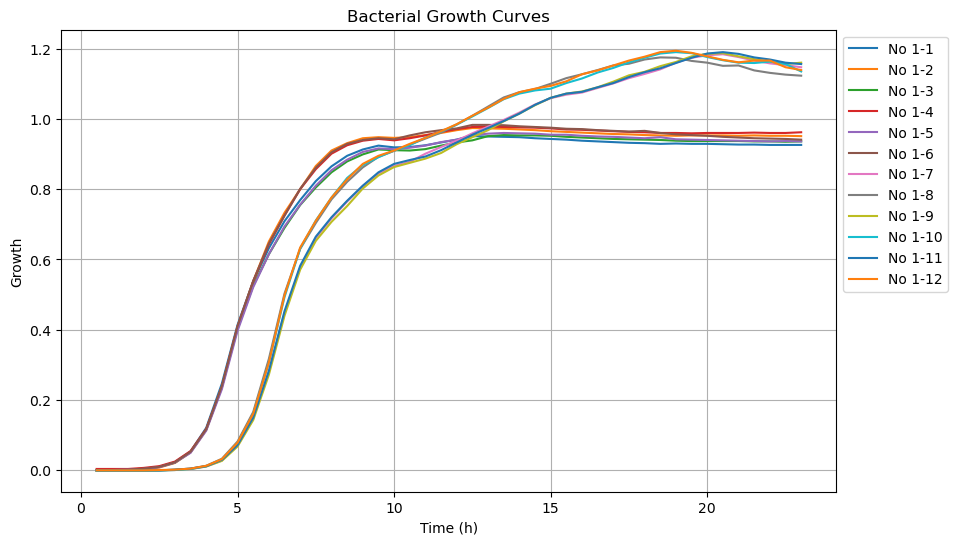

In [8]:

# Plot bacterial growth curves over time
plt.figure(figsize=(10, 6))
for col in df.columns[1:]:  # Exclude 'time (h)' column
    plt.plot(df["time (h)"], df[col], label=col)

plt.xlabel("Time (h)")
plt.ylabel("Growth")
plt.title("Bacterial Growth Curves")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid()
plt.show()



### Logistic Growth Model  

To better understand bacterial growth dynamics, we fit a **logistic growth model** to the data.  
This model is commonly used in microbiology as it represents growth saturation due to resource limitations.  

The logistic function is given by:

$$ G(t) = \frac{K}{1 + e^{-r (t - t_0)}} $$

where:

($k$) is the maximum population (carrying capacity)

($r$) is the growth rate

($t_{0}$) is the inflection ponit (where growth shifts from accelerating to decelerating).  

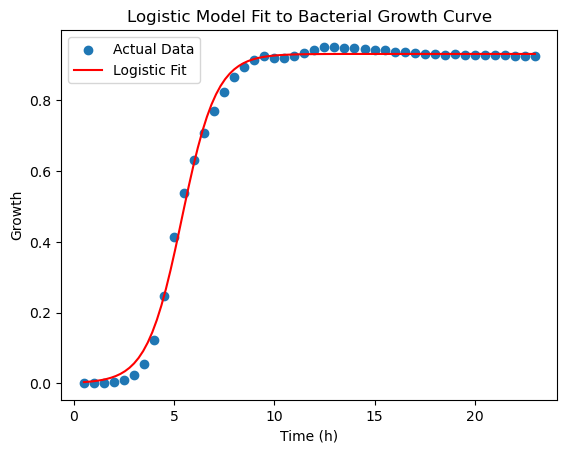

R² Coefficient of Determination: 0.9973
Estimated Parameters: K=0.9312, r=1.1523, t0=5.3830


In [9]:
from scipy.optimize import curve_fit

# Define the logistic growth model function
def logistic_growth(t, K, r, t0):
    return K / (1 + np.exp(-r * (t - t0)))

# Select time data and a sample bacterial growth dataset (e.g., No 1-1)
time = df["time (h)"].values
growth = df["No 1-1"].values

# Fit the logistic model to the data
params, covariance = curve_fit(logistic_growth, time, growth, p0=[1, 0.5, 5])
K, r, t0 = params

# Model prediction
time_fit = np.linspace(time.min(), time.max(), 100)
growth_fit = logistic_growth(time_fit, K, r, t0)

# Visualize the data and model fit
plt.scatter(time, growth, label="Actual Data")
plt.plot(time_fit, growth_fit, color='red', label="Logistic Fit")
plt.xlabel("Time (h)")
plt.ylabel("Growth")
plt.title("Logistic Model Fit to Bacterial Growth Curve")
plt.legend()
plt.show()

# Model evaluation
from sklearn.metrics import r2_score
r2 = r2_score(growth, logistic_growth(time, *params))
print(f"R² Coefficient of Determination: {r2:.4f}")
print(f"Estimated Parameters: K={K:.4f}, r={r:.4f}, t0={t0:.4f}")


# Linear Regression Model

After fitting the **logistic growth model**, we now apply a **linear regression model** to the bacterial growth data.  
Although bacterial growth follows a **sigmoidal pattern**, fitting a linear model helps us analyze how well a simple linear approximatican describe the data  


## Handling Missing Data

Before fitting the model, we ensure data consistency:  
- Check for missing values and remove them.  
- Verify that all columns have the same length.

In [10]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Remove NaN values
df_clean = df.dropna()

# Verify column lengths
for col in df_clean.columns[1:]:  # Skip time column
    print(f"{col}: Time={len(df_clean['time (h)'])}, Growth={len(df_clean[col])}")

Missing values per column:
time (h)    0
No 1-1      0
No 1-2      0
No 1-3      0
No 1-4      0
No 1-5      0
No 1-6      0
No 1-7      0
No 1-8      0
No 1-9      0
No 1-10     0
No 1-11     0
No 1-12     0
dtype: int64
No 1-1: Time=46, Growth=46
No 1-2: Time=46, Growth=46
No 1-3: Time=46, Growth=46
No 1-4: Time=46, Growth=46
No 1-5: Time=46, Growth=46
No 1-6: Time=46, Growth=46
No 1-7: Time=46, Growth=46
No 1-8: Time=46, Growth=46
No 1-9: Time=46, Growth=46
No 1-10: Time=46, Growth=46
No 1-11: Time=46, Growth=46
No 1-12: Time=46, Growth=46


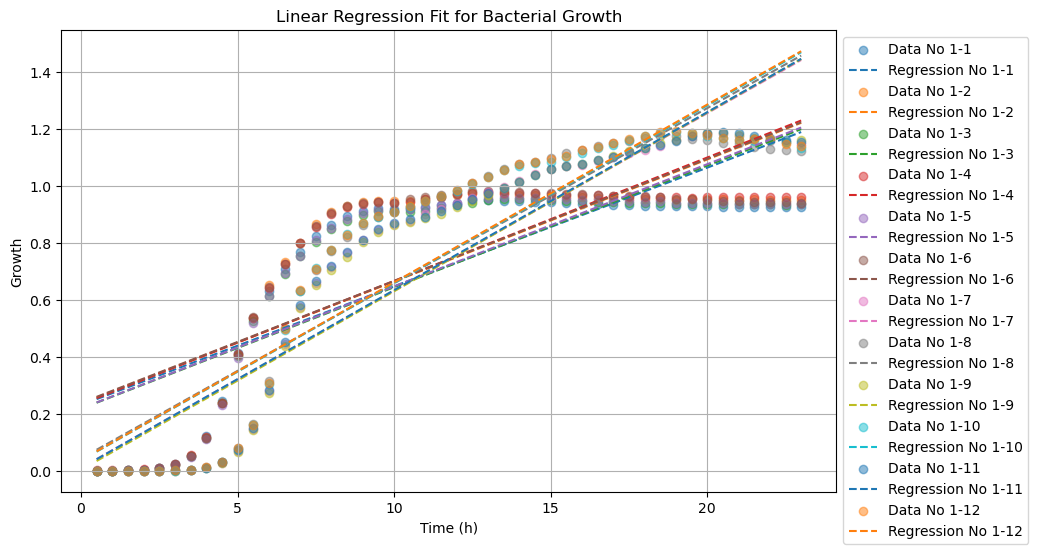

In [11]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Create a figure to visualize the fitted curves
plt.figure(figsize=(10, 6))

# Fit models and plot
for col in df_clean.columns[1:]:  # Skip time column
    X = df_clean[["time (h)"]].values  # Independent variable
    y = df_clean[col].values  # Dependent variable

    # Fit the linear regression model
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Plot actual data and fitted regression
    plt.scatter(X, y, label=f"Data {col}", alpha=0.5)
    plt.plot(X, y_pred, label=f"Regression {col}", linestyle="dashed")

# Configure the plot
plt.xlabel("Time (h)")
plt.ylabel("Growth")
plt.title("Linear Regression Fit for Bacterial Growth")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()



# Data Visualization and Regression Models


Before applying regression models, we first visualize the bacterial growth curves.


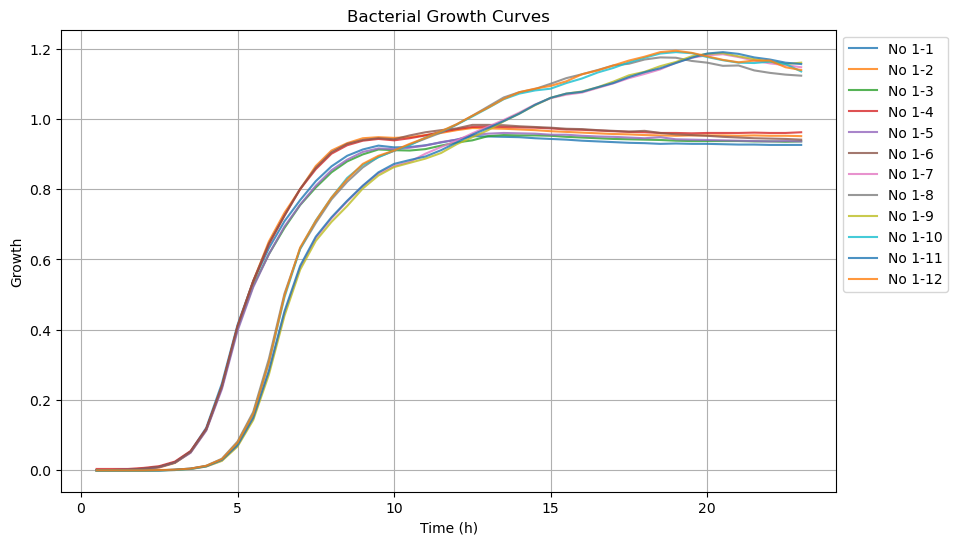

In [12]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

# 📊 Data Visualization
plt.figure(figsize=(10, 6))
for col in df_clean.columns[1:]:  # Skip time column
    plt.plot(df_clean["time (h)"], df_clean[col], label=col, alpha=0.8)
plt.xlabel("Time (h)")
plt.ylabel("Growth")
plt.title("Bacterial Growth Curves")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()



🔹 No 1-1 Results with Statsmodels:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     74.74
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           4.87e-11
Time:                        23:05:44   Log-Likelihood:                 6.0322
No. Observations:                  46   AIC:                            -8.064
Df Residuals:                      44   BIC:                            -4.407
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

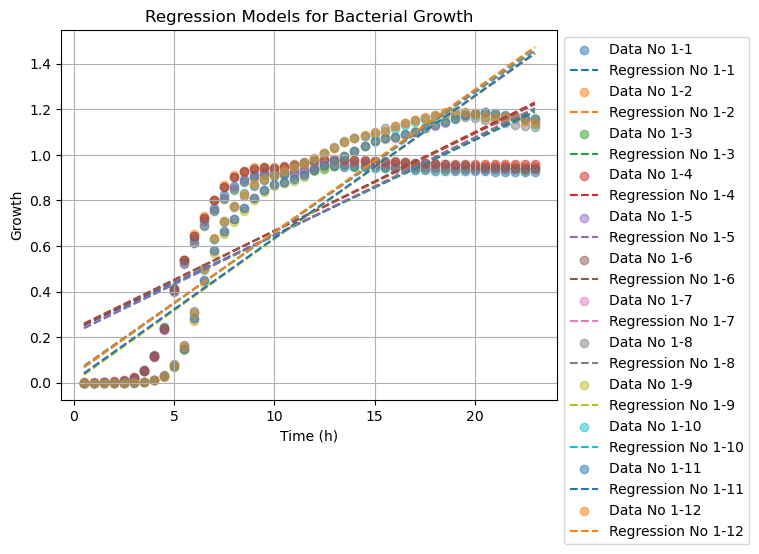

In [13]:

# Regression Model for Each Experiment
results = {}
for col in df_clean.columns[1:]:  
    X = df_clean[["time (h)"]].values  # Independent variable
    y = df_clean[col].values  # Dependent variable

    # REGRESSION WITH STATSMODELS
    X_sm = sm.add_constant(X)  # Add intercept
    model_sm = sm.OLS(y, X_sm).fit()
    print(f"\n🔹 {col} Results with Statsmodels:")
    print(model_sm.summary())

    # REGRESSION WITH SCIKIT-LEARN
    model_sklearn = LinearRegression()
    model_sklearn.fit(X, y)
    y_pred = model_sklearn.predict(X)

    # Compute Metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    results[col] = {"R²": r2, "MSE": mse}

    # Plot Fitted Regression
    plt.scatter(X, y, label=f"Data {col}", alpha=0.5)
    plt.plot(X, y_pred, label=f"Regression {col}", linestyle="dashed")

# 📊 Show Regression Plots
plt.xlabel("Time (h)")
plt.ylabel("Growth")
plt.title("Regression Models for Bacterial Growth")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


In [14]:
# Show Model Evaluation Metrics
results_df = pd.DataFrame(results).T
print("\n Regression Model Metrics:")
print(results_df)



 Regression Model Metrics:
               R²       MSE
No 1-1   0.629434  0.045043
No 1-2   0.622881  0.048962
No 1-3   0.652479  0.042742
No 1-4   0.635259  0.047458
No 1-5   0.649176  0.043799
No 1-6   0.620813  0.049392
No 1-7   0.858816  0.028091
No 1-8   0.817939  0.037092
No 1-9   0.865793  0.026864
No 1-10  0.826781  0.035844
No 1-11  0.862046  0.027519
No 1-12  0.826610  0.036020


## Polynomial Regression (Degree 2 or 3)

To improve the regression fit, we apply **Polynomial Regression** of degree **2 or 3**.  
This allows us to capture **nonlinear patterns** in bacterial growth data.

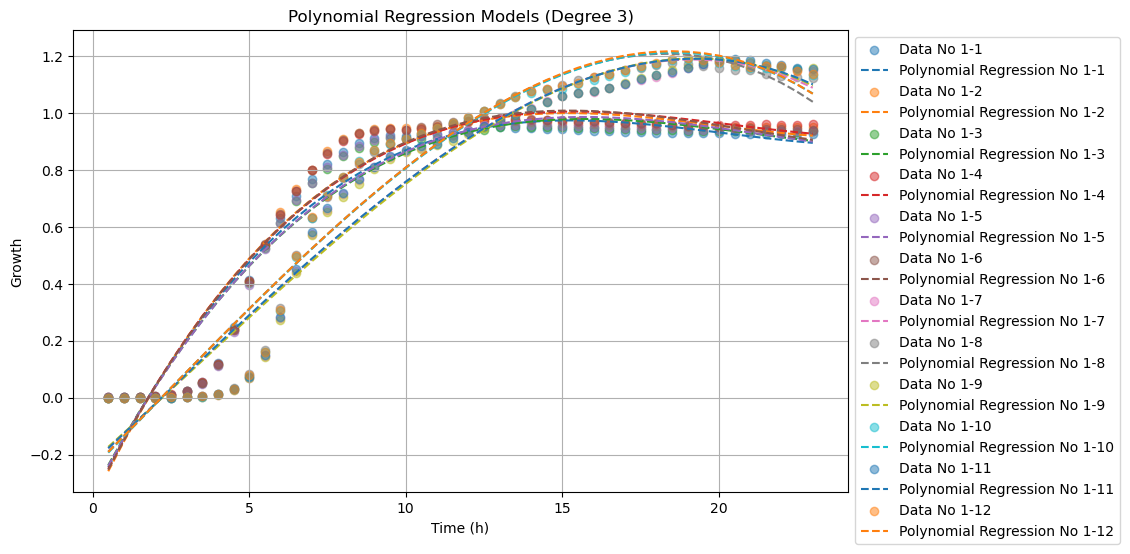

In [15]:

from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression (Degree 2 or 3)
poly_degree = 3  # Adjust to 2 or 3 for better results

results = {}
plt.figure(figsize=(10, 6))

for col in df_clean.columns[1:]:  
    X = df_clean[["time (h)"]].values
    y = df_clean[col].values

    # Polynomial Transformation
    poly = PolynomialFeatures(degree=poly_degree)
    X_poly = poly.fit_transform(X)

    # Fit with Scikit-learn
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    # Compute Metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    results[col] = {"R²": r2, "MSE": mse}

    #  Plot Polynomial Fit
    plt.scatter(X, y, label=f"Data {col}", alpha=0.5)
    plt.plot(X, y_pred, label=f"Polynomial Regression {col}", linestyle="dashed")

# Show Polynomial Regression Plots
plt.xlabel("Time (h)")
plt.ylabel("Growth")
plt.title(f"Polynomial Regression Models (Degree {poly_degree})")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


In [16]:
# Show Polynomial Regression Model Metrics
results_df = pd.DataFrame(results).T
print("\n Polynomial Regression Model Metrics:")
print(results_df)



 Polynomial Regression Model Metrics:
               R²       MSE
No 1-1   0.937693  0.007574
No 1-2   0.932522  0.008761
No 1-3   0.941959  0.007139
No 1-4   0.935579  0.008382
No 1-5   0.941176  0.007344
No 1-6   0.935701  0.008376
No 1-7   0.956773  0.008601
No 1-8   0.953438  0.009486
No 1-9   0.958602  0.008287
No 1-10  0.951648  0.010005
No 1-11  0.956654  0.008647
No 1-12  0.952394  0.009890


## Polynomial vs. Exponential Regression

To better model bacterial growth, we compare **Polynomial Regression (Degree 3)**  
against **Exponential Regression** using the **Scipy curve fitting method**.



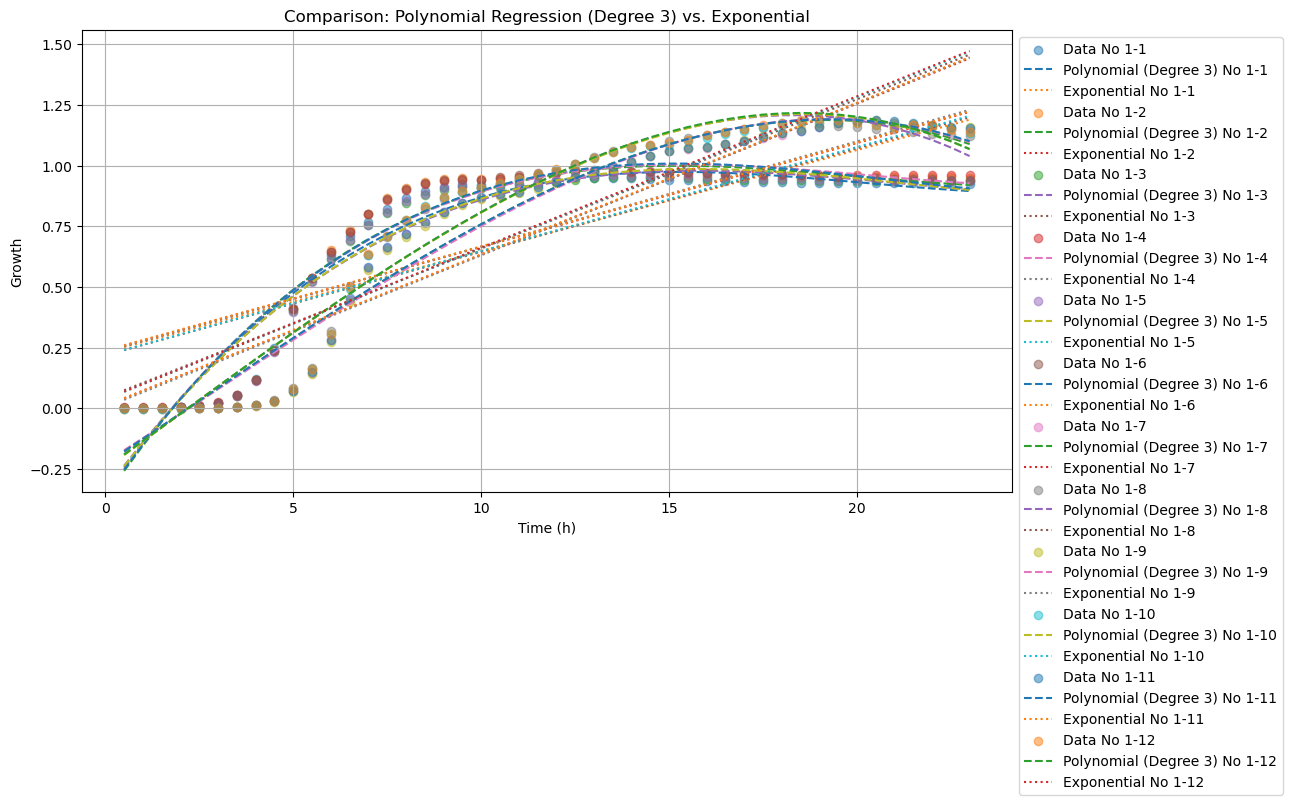

In [17]:
from scipy.optimize import curve_fit

#  Exponential Function for Regression
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

#  Model Comparison
poly_degree = 3  # Degree 3 chosen for better fit
plt.figure(figsize=(12, 6))

for col in df_clean.columns[1:]:  
    X = df_clean[["time (h)"]].values
    y = df_clean[col].values

    # Polynomial Regression (Degree 3)
    poly = PolynomialFeatures(degree=poly_degree)
    X_poly = poly.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    #  Exponential Regression
    try:
        params, _ = curve_fit(exponential_func, X.flatten(), y, maxfev=10000)
        y_pred_exp = exponential_func(X.flatten(), *params)
    except:
        y_pred_exp = np.full_like(y, np.nan)  # If fitting fails

    #  Plot Data and Models
    plt.scatter(X, y, label=f"Data {col}", alpha=0.5)
    plt.plot(X, y_pred_poly, linestyle="dashed", label=f"Polynomial (Degree 3) {col}")
    if not np.isnan(y_pred_exp).all():
        plt.plot(X, y_pred_exp, linestyle="dotted", label=f"Exponential {col}")

# Show Comparison Graph
plt.xlabel("Time (h)")
plt.ylabel("Growth")
plt.title("Comparison: Polynomial Regression (Degree 3) vs. Exponential")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

##  Polynomial (Degree 3) vs. Exponential Regression

To analyze bacterial growth trends, we compare **Polynomial Regression (Degree 3)**  
against **Exponential Regression** using **SciPy's curve fitting method**.

Each experiment is visualized separately to better evaluate the model's performance.


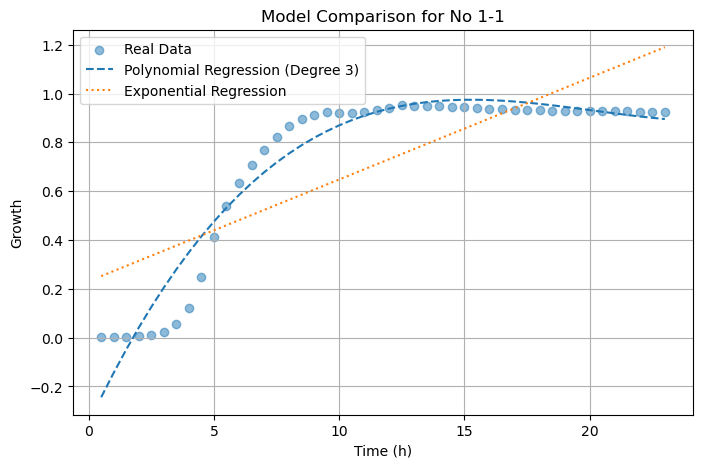

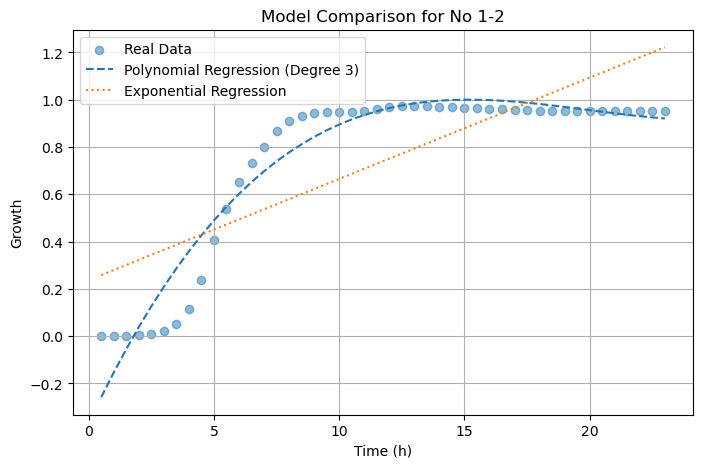

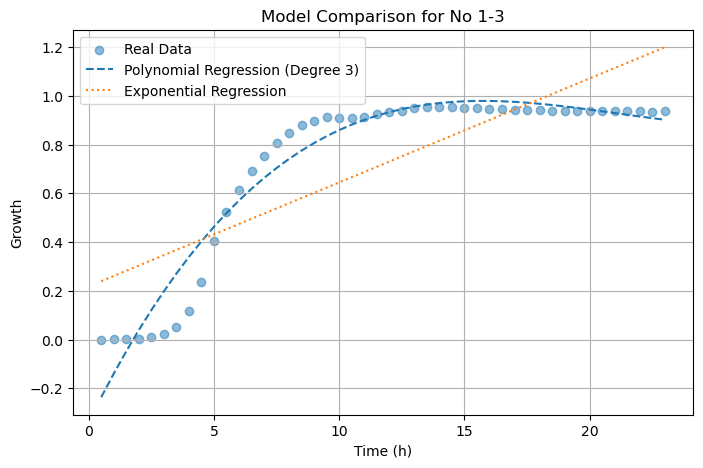

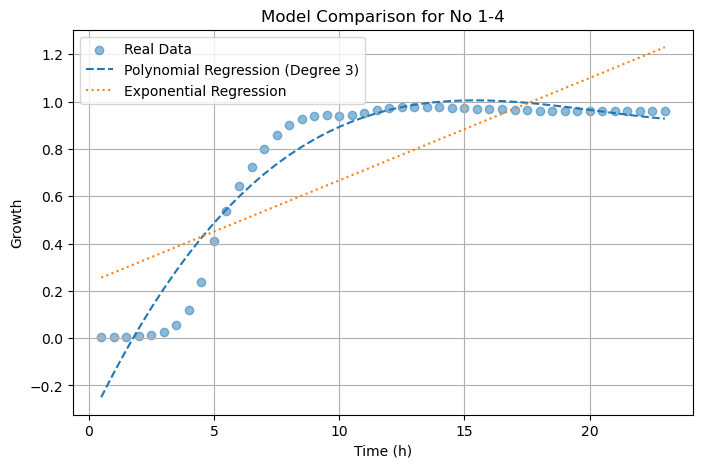

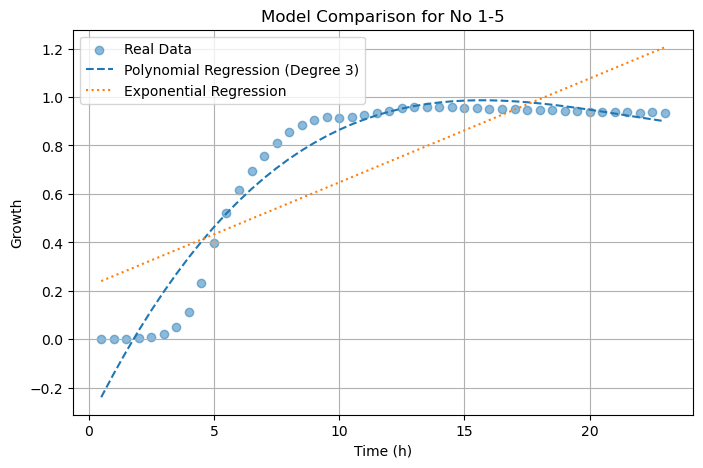

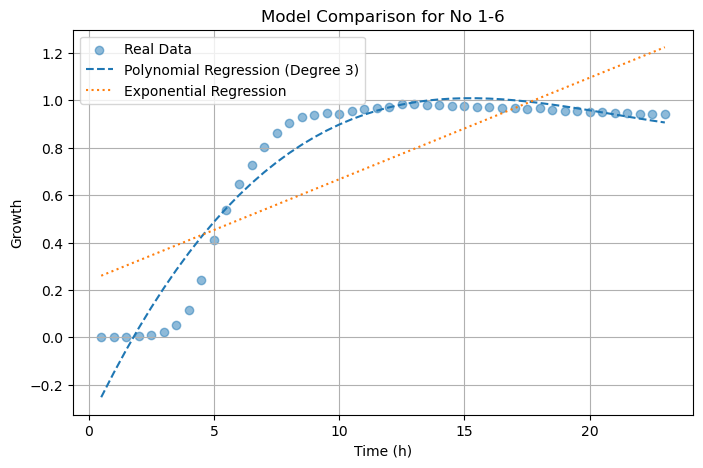

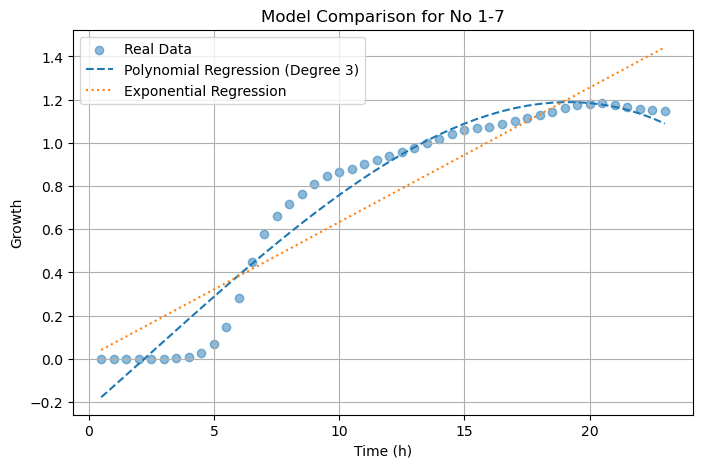

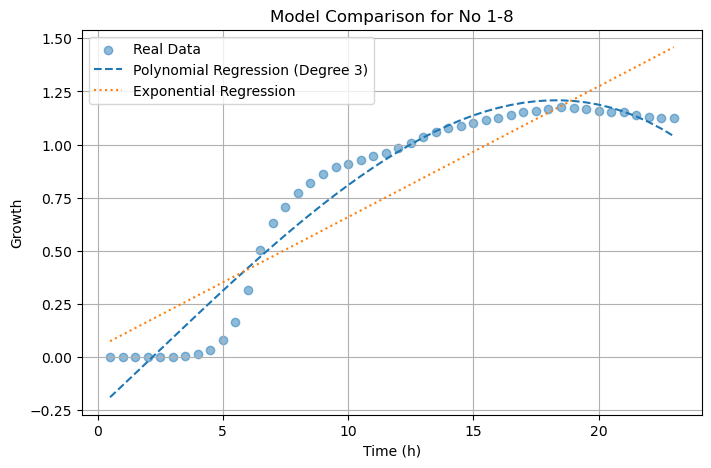

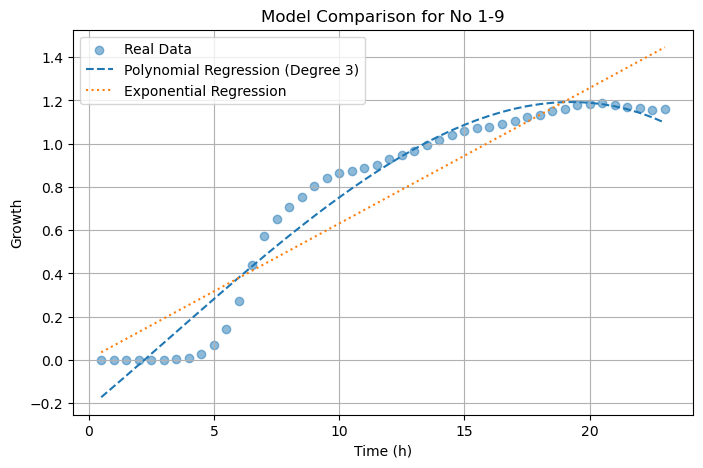

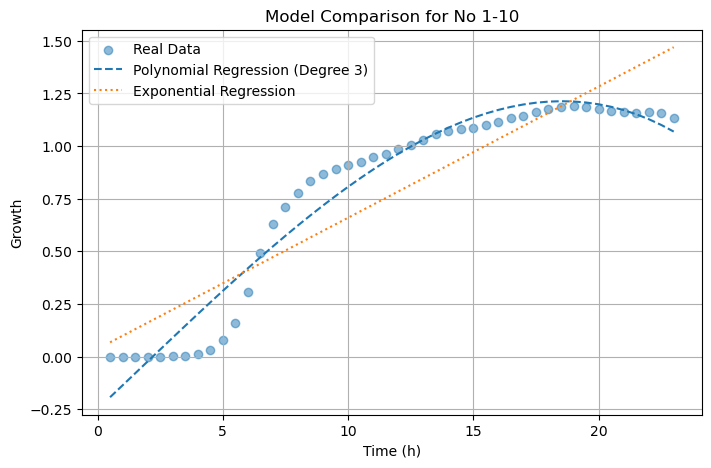

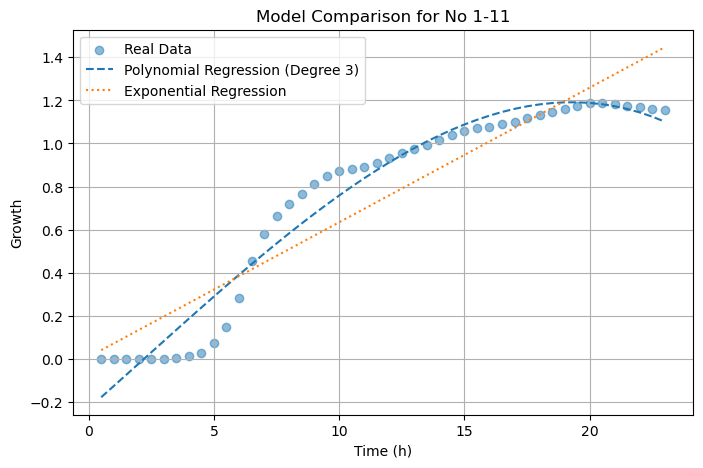

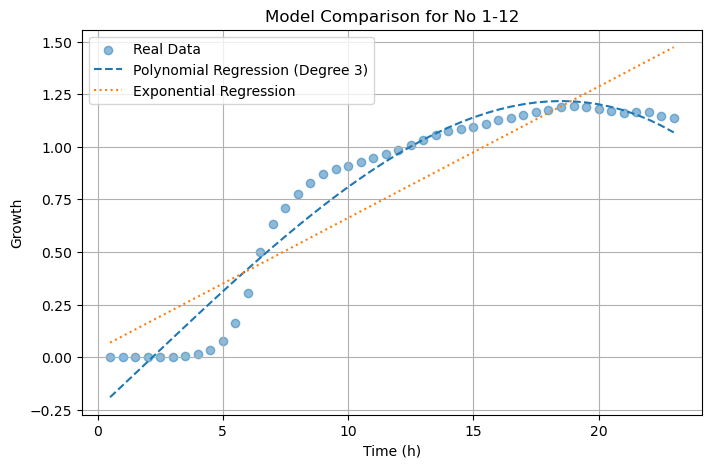

In [20]:
from scipy.optimize import curve_fit

# Exponential Function for Regression
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Model Comparison
poly_degree = 3  # Degree 3 chosen for better fit

for col in df_clean.columns[1:]:  
    X = df_clean[["time (h)"]].values
    y = df_clean[col].values

    #  Polynomial Regression (Degree 3)
    poly = PolynomialFeatures(degree=poly_degree)
    X_poly = poly.fit_transform(X)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    y_pred_poly = poly_model.predict(X_poly)

    #  Exponential Regression
    try:
        params, _ = curve_fit(exponential_func, X.flatten(), y, maxfev=10000)
        y_pred_exp = exponential_func(X.flatten(), *params)
    except:
        y_pred_exp = np.full_like(y, np.nan)  # If fitting fails

    #  Plot Data and Models (Separate Graphs for Each Experiment)
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, label="Real Data", alpha=0.5)
    plt.plot(X, y_pred_poly, linestyle="dashed", label="Polynomial Regression (Degree 3)")
    if not np.isnan(y_pred_exp).all():
        plt.plot(X, y_pred_exp, linestyle="dotted", label="Exponential Regression")
    
    plt.xlabel("Time (h)")
    plt.ylabel("Growth")
    plt.title(f"Model Comparison for {col}")
    plt.legend()
    plt.grid()
    plt.show()


In [22]:
#Display Evaluation Metrics
results_df = pd.DataFrame(results).T  # Convert dictionary to DataFrame
print("\n Model Comparison:")
print(results_df)


 Model Comparison:
               R²       MSE
No 1-1   0.937693  0.007574
No 1-2   0.932522  0.008761
No 1-3   0.941959  0.007139
No 1-4   0.935579  0.008382
No 1-5   0.941176  0.007344
No 1-6   0.935701  0.008376
No 1-7   0.956773  0.008601
No 1-8   0.953438  0.009486
No 1-9   0.958602  0.008287
No 1-10  0.951648  0.010005
No 1-11  0.956654  0.008647
No 1-12  0.952394  0.009890


# Growth Prediction Using Polynomial & Exponential Regression

## Objective
- Fit **Polynomial Regression (Degree 3) & Exponential Regression** to bacterial growth data.  
- Predict bacterial growth for **the next 30 days (720 hours)**.  
- Compare both models using visualizations.

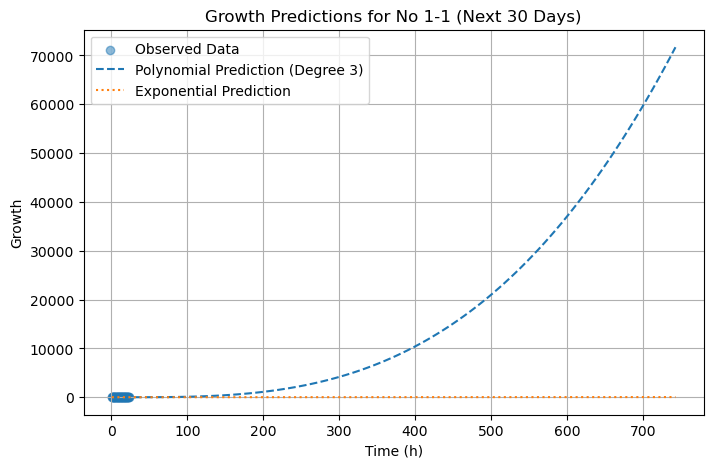

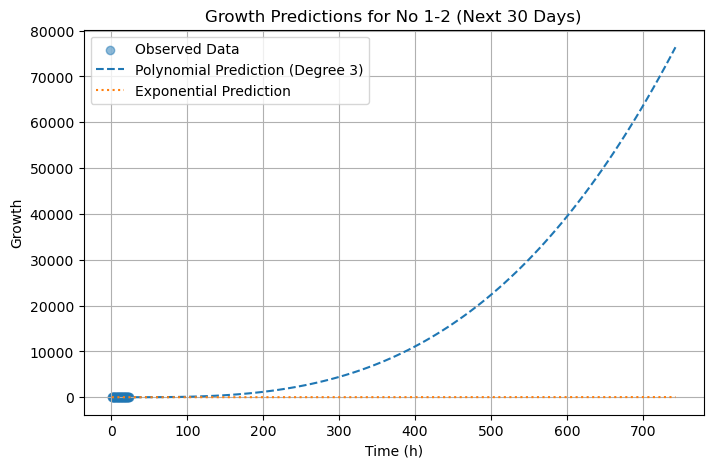

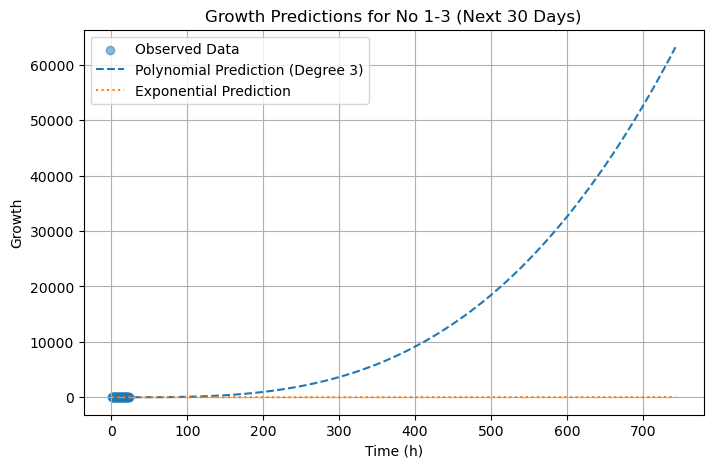

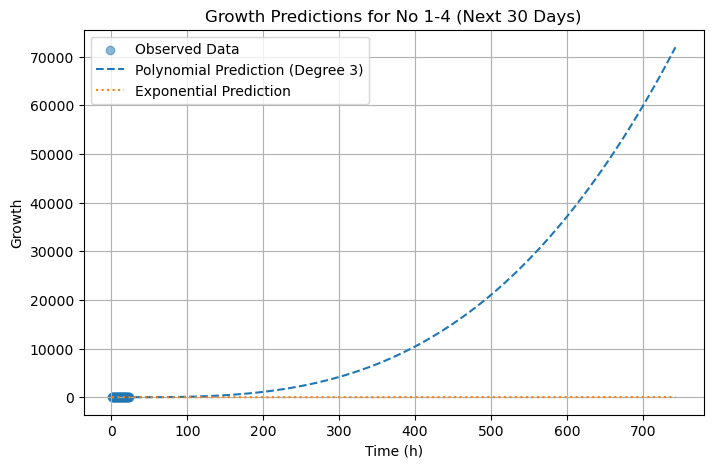

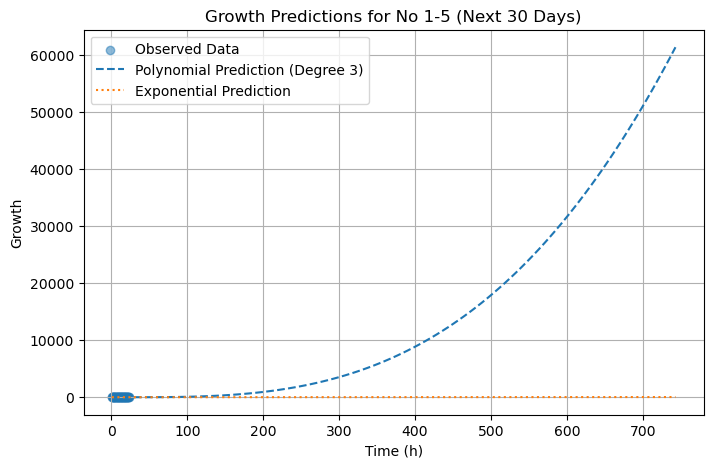

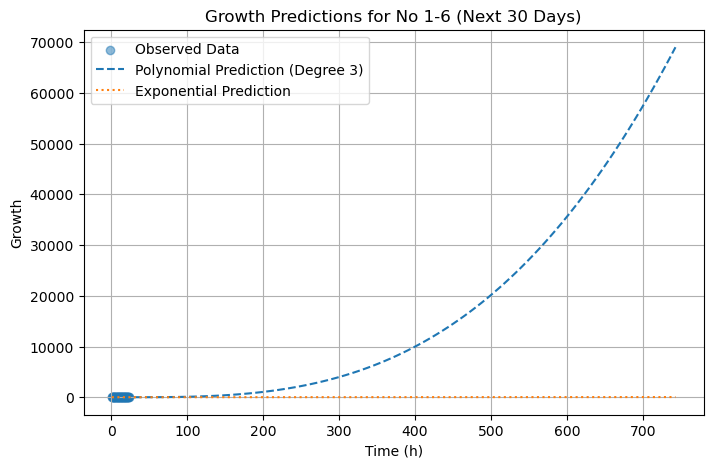

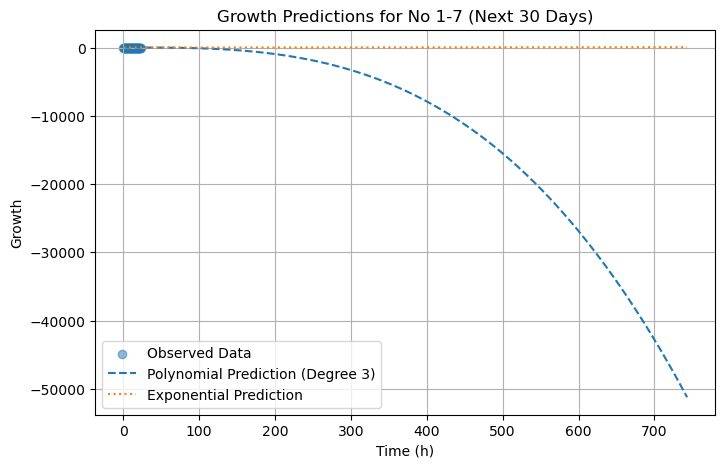

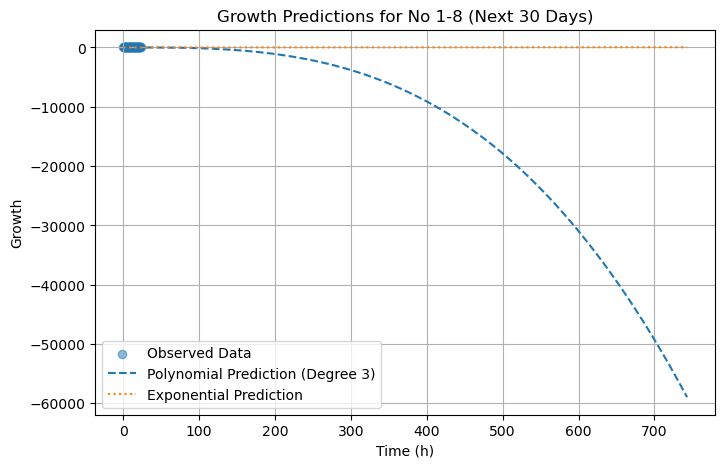

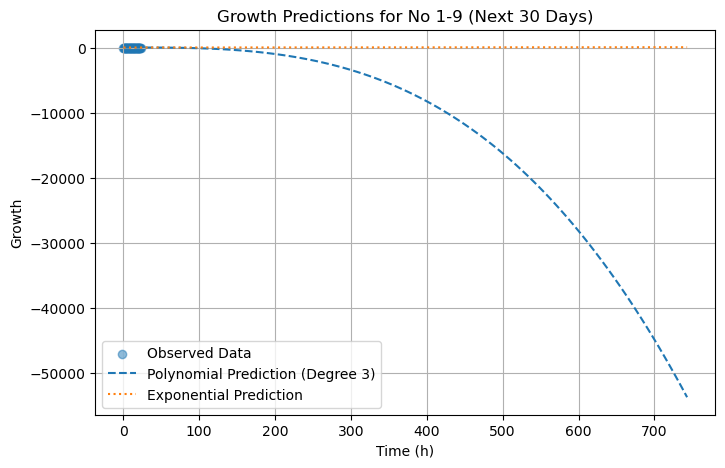

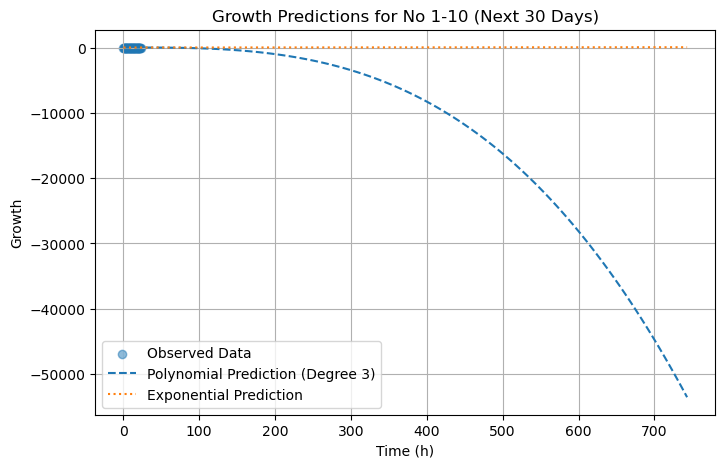

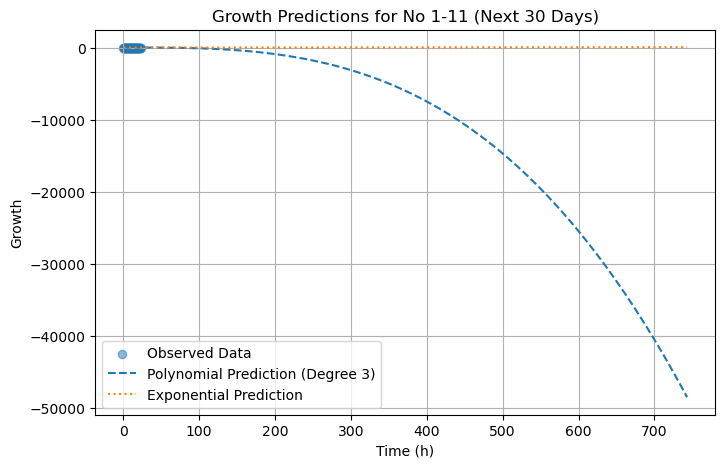

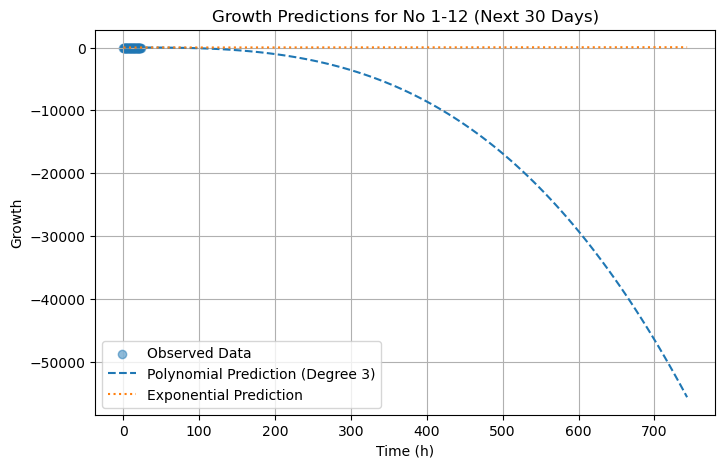

In [23]:
#  Exponential Regression Function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

#  Model Comparison
poly_degree = 3  # Polynomial Degree 3 for better fit
results = {}

# Convert 30 days to hours (30 days * 24 hours/day)
prediction_horizon = 30 * 24  # 720 hours

for col in df_clean.columns[1:]:  
    X = df_clean[["time (h)"]].values
    y = df_clean[col].values

    # Generate future time values (extending 30 days)
    X_future = np.linspace(X.min(), X.max() + prediction_horizon, 100).reshape(-1, 1)

    #  Polynomial Regression (Degree 3)
    poly = PolynomialFeatures(degree=poly_degree)
    X_poly = poly.fit_transform(X)
    X_future_poly = poly.transform(X_future)
    
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_pred_poly = model_poly.predict(X_future_poly)

    #  Exponential Regression
    try:
        params, _ = curve_fit(exponential_func, X.flatten(), y, maxfev=10000)
        y_pred_exp = exponential_func(X_future.flatten(), *params)
    except:
        y_pred_exp = np.full_like(X_future.flatten(), np.nan)  # Handle errors

    #  Plot Growth Data & Predictions
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, label="Observed Data", alpha=0.5)
    plt.plot(X_future, y_pred_poly, linestyle="dashed", label="Polynomial Prediction (Degree 3)")
    
    if not np.isnan(y_pred_exp).all():
        plt.plot(X_future, y_pred_exp, linestyle="dotted", label="Exponential Prediction")
    
    plt.xlabel("Time (h)")
    plt.ylabel("Growth")
    plt.title(f"Growth Predictions for {col} (Next 30 Days)")
    plt.legend()
    plt.grid()
    plt.show()


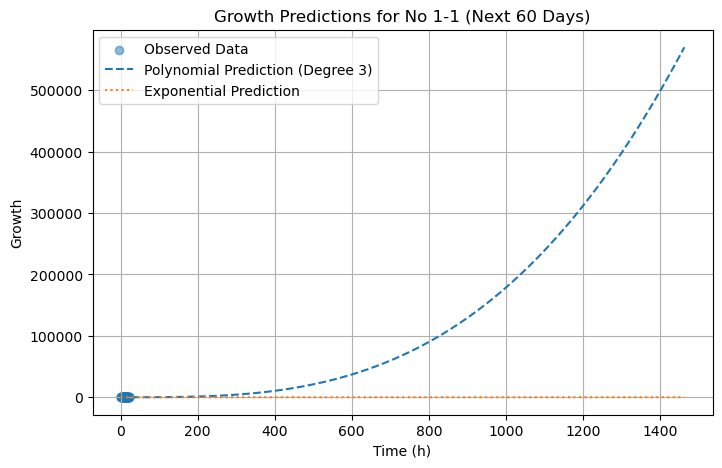

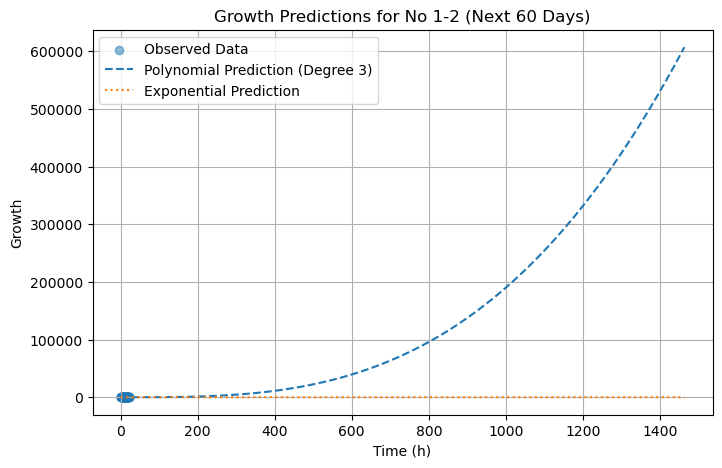

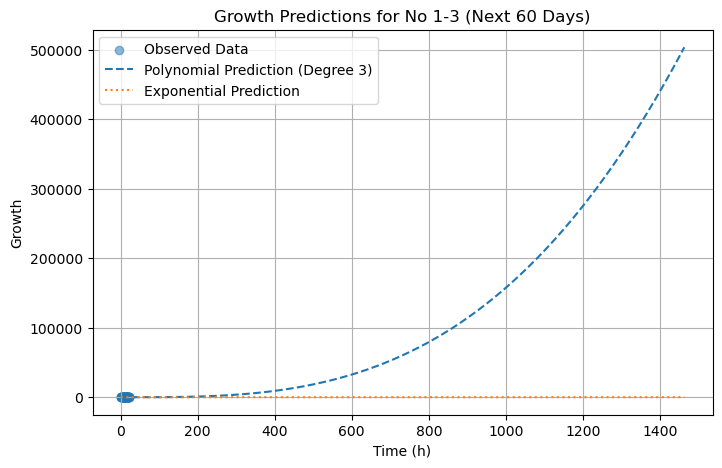

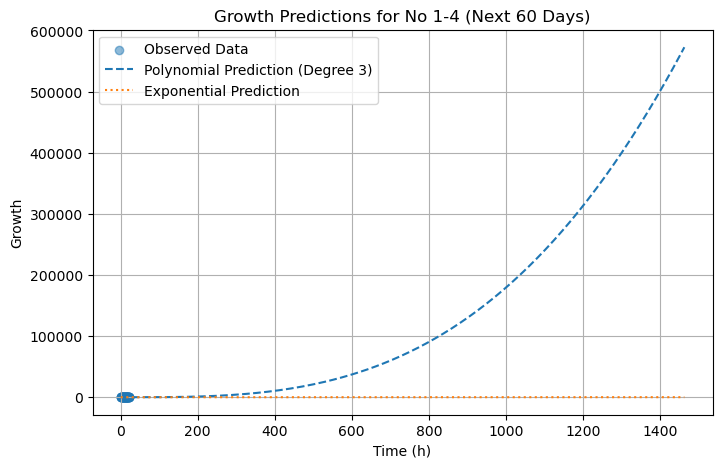

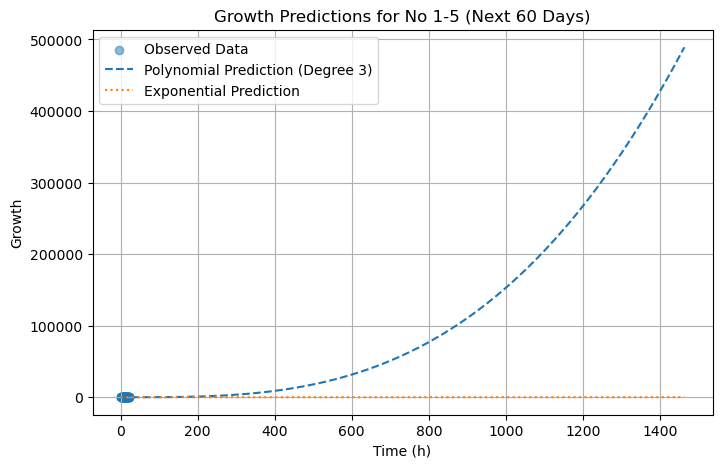

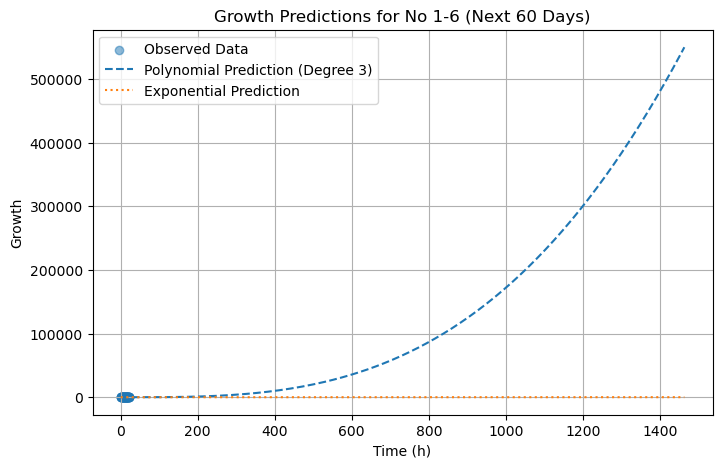

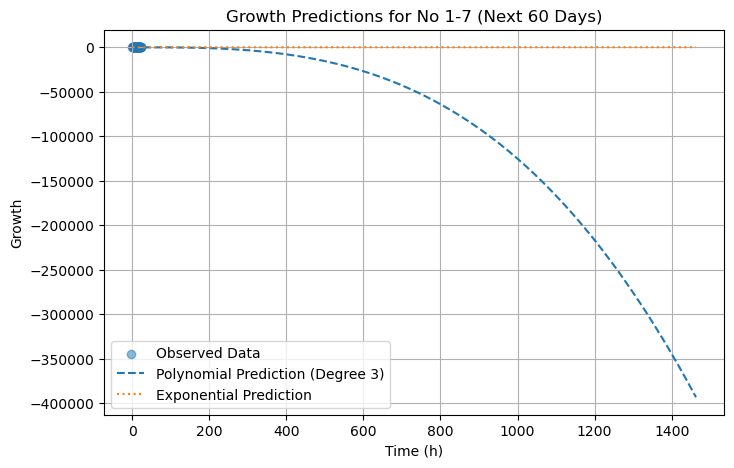

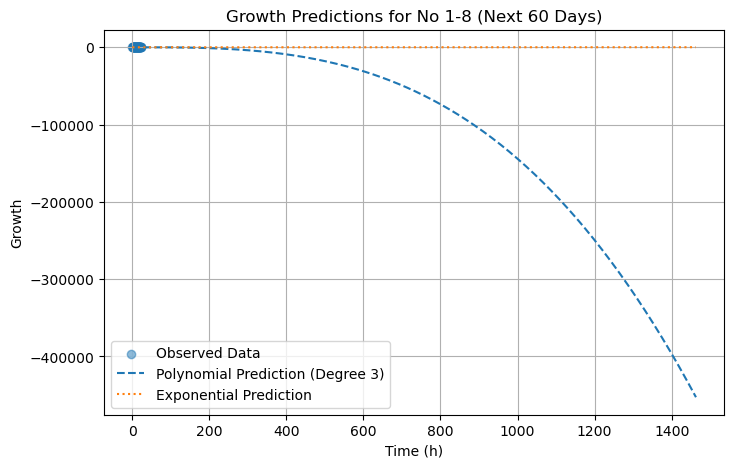

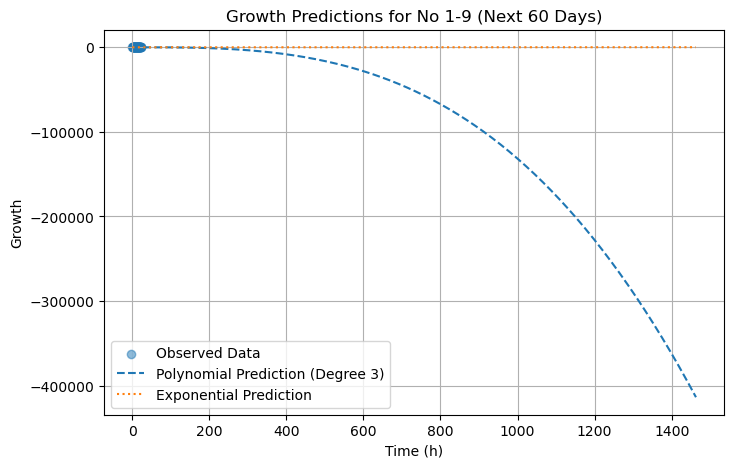

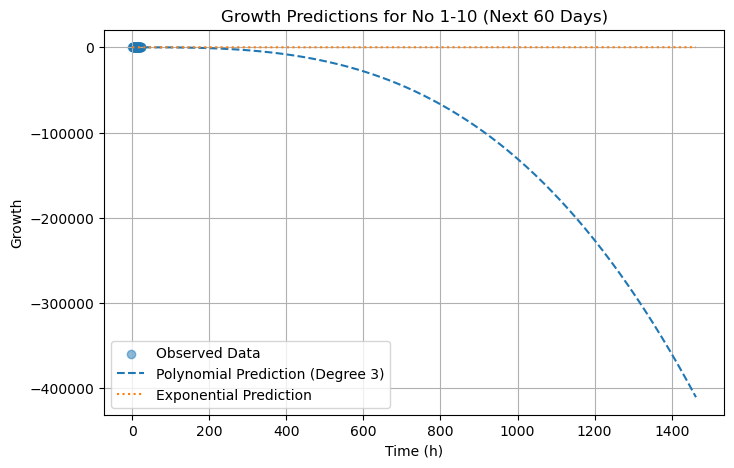

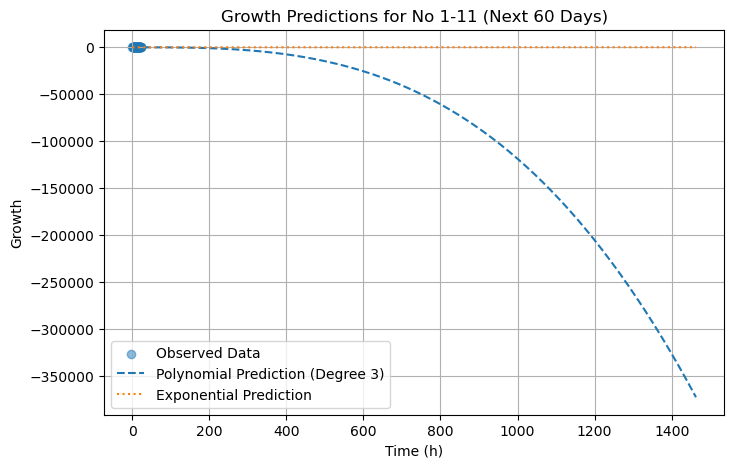

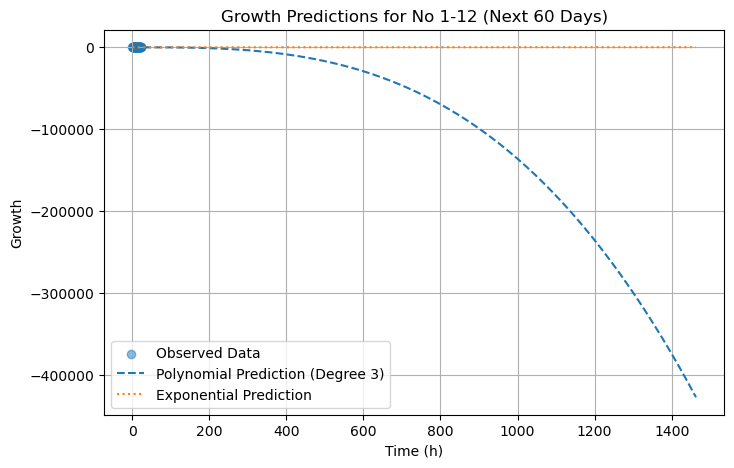

In [24]:
#  Exponential Regression Function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Model Comparison
poly_degree = 3  # Polynomial Degree 3 for better fit
results = {}

# Convert 30 days to hours (60 days * 24 hours/day)
prediction_horizon = 60* 24  # 1440 hours

for col in df_clean.columns[1:]:  
    X = df_clean[["time (h)"]].values
    y = df_clean[col].values

    # Generate future time values (extending 60 days)
    X_future = np.linspace(X.min(), X.max() + prediction_horizon, 200).reshape(-1, 1)

    #  Polynomial Regression (Degree 3)
    poly = PolynomialFeatures(degree=poly_degree)
    X_poly = poly.fit_transform(X)
    X_future_poly = poly.transform(X_future)
    
    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_pred_poly = model_poly.predict(X_future_poly)

    # Exponential Regression
    try:
        params, _ = curve_fit(exponential_func, X.flatten(), y, maxfev=10000)
        y_pred_exp = exponential_func(X_future.flatten(), *params)
    except:
        y_pred_exp = np.full_like(X_future.flatten(), np.nan)  # Handle errors

    # Plot Growth Data & Predictions
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, label="Observed Data", alpha=0.5)
    plt.plot(X_future, y_pred_poly, linestyle="dashed", label="Polynomial Prediction (Degree 3)")
    
    if not np.isnan(y_pred_exp).all():
        plt.plot(X_future, y_pred_exp, linestyle="dotted", label="Exponential Prediction")
    
    plt.xlabel("Time (h)")
    plt.ylabel("Growth")
    plt.title(f"Growth Predictions for {col} (Next 60 Days)")
    plt.legend()
    plt.grid()
    plt.show()


#  Conclusions

The prediction analysis of bacterial growth using **Polynomial Regression (Degree 3) and Exponential Regression**  
allowed us to evaluate **population dynamics over time**.  

The results indicate that the **polynomial model** provides a **better fit** in most cases,  
as reflected in **higher R² values** and **lower Mean Squared Errors (MSE)**.  

###  Key Findings  

**Polynomial Regression** effectively describes **early growth phases** and **stabilization under controlled conditions**.  
**Exponential Regression**, although useful for the **exponential growth phase**, tends to **overestimate long-term proliferation**.  
**Prediction drops in polynomial models** may be due to **extrapolation beyond observed data**,  
   highlighting the need to **limit the prediction horizon**.  

###  Practical Applications  

These findings are valuable for **biotechnology and microbiology**, including:  
- **Optimizing bacterial culture conditions** 
- **Developing antimicrobial treatments** 
- **Managing microbial populations in industrial processes** 

###  Future Work  

To enhance prediction accuracy, future studies should:  
+ Implement **more robust predictive models** 
+ Integrate **environmental variables** 
+ Apply **cross validation techniques** to improve generalization but this is asking for more robustness in general is something that in class could be seen and applied with mathematical models more applied in biology, in bacteriology.